In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy import optimize
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper

In [32]:
def initialize(fileName):
    '''this function reads the file at fileName into a pandas dataframe and creates a variable for the scan range'''
    from scipy import optimize
    global scanSize
    global data
    global wavelength
    global series
    global fileString
    fileString = fileName.drop[-3:]
    #define variable for number of pixels in scan
    from matplotlib import cm
    #read in csv file to create pandas dataframe
    dataTrans = pd.read_csv(fileName, header = None, sep=',')
    #transpose data to make pixel information contained in the columns
    data = dataTrans.transpose()
    #extract wavelength axis
    wavelength = data[0].copy()
    scanSize = len(data)
    for i in range(1,data.shape[1],2):
        series.append(data[i])
    return print('data loaded')

In [40]:
initialize('Pushing/mos2_PL6_816.csv')

data loaded


In [41]:
seriesTemp = pd.DataFrame(series)
seriesTemp.to_csv(fileString + '_series.csv')
wlTemp = pd.DataFrame(wavelength)
wlTemp.to_csv(fileString + '_wavelength.csv')

In [151]:
newSeries = series.copy()
del newSeries[-6:]
for i in reversed(range(-6,-1)):
    newSeries.insert(0, series[i])
del newSeries[0:7]

In [222]:
def plotSpectra():
    '''plots spectra for forward and reverse scans. Subset of images can be plotted 
    by increasing variable indexStep.'''
    indexStep = 1
    #plot forward scan spectra 
    for i in range(1,len(newSeries),indexStep):
        plt.plot(wavelength, newSeries[i])
    plt.axis([650, 750, 0, 19500])
    plotName = 'Pushing/intensitySpectra'+'.png'
    plt.savefig(plotName)
    plt.show()

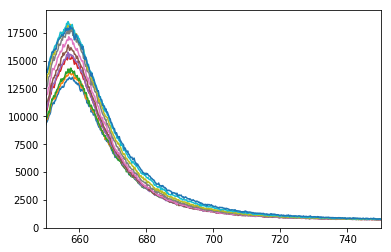

In [223]:
plotSpectra()

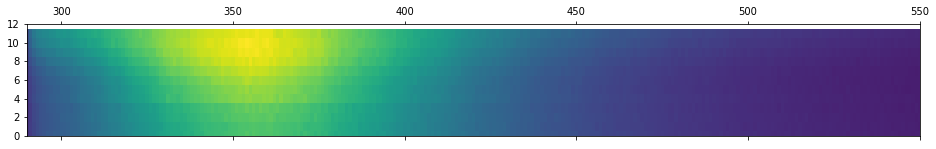

In [216]:
plt.matshow(newSeries, interpolation=None, aspect='auto', vmin = 0, vmax = 18500)
plt.axis([290, 550, 0, len(newSeries)])
plt.show()

In [155]:
def setRange(specNum,rangeLow,rangeHigh):
    '''plots spectrum number specNum in range rangeLow to rangeHigh'''
    global x_data
    global y_data
    global rangeH
    global rangeL
    %matplotlib inline
    rangeH = rangeHigh
    rangeL = rangeLow
    x_data = wavelength[rangeLow:rangeHigh]
    y_data = newSeries[specNum][rangeLow:rangeHigh]
    # And plot it
    plt.figure(figsize=(6, 4))
    return plt.scatter(x_data, y_data)

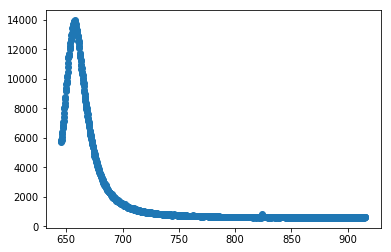

In [156]:
setRange(2, 300, 1590)

In [157]:
def lor_3(x, a, b, c, d, e, f, g, h, i, j):
    return a/((x-b)**2 + c**2)+ d/((x-e)**2 + f**2) + g/((x-h)**2 + i**2) + j;

In [158]:
def lor_2(x, a, b, c, d, e, f, j):
    return a/((x-b)**2 + c**2)+ d/((x-e)**2 + f**2) + j;

In [159]:
def lor_1(x, a, b, c, j):
    return a/((x-b)**2 + c**2) + j;

In [160]:
def fitSpectrum3():
    '''fits to one lorentzian with params: int, position, width, offset.'''
    global x_data
    global y_data
    global initParams2
    global paramBounds2
    initParams2=[10000, 655, 30, 10000, 670, 30, 10000, 770, 20, 590]
    paramBounds2=([0, 655, 1, 0, 660, 1, 0, 750, 1, 580],[10000000, 659, 100, 10000000, 690, 100, 10000000, 775, 100, 600])
    params, params_covariance = optimize.curve_fit(lor_3, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
    print(params)
    plt.figure(figsize=(6, 4))
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7], params[8], params[9]),
            label='Fitted function')
    plt.legend(loc='best')
    return plt.show()

In [161]:
def fitSpectrum2():
    '''fits to one lorentzian with params: int, position, width, offset.'''
    global x_data
    global y_data
    global initParams2
    global paramBounds2
    initParams2=[10000, 655, 30, 10000, 770, 20, 590]
    paramBounds2=([0, 655, 1, 0, 750, 1, 580],[10000000, 690, 100, 10000000, 775, 100, 600])
    params, params_covariance = optimize.curve_fit(lor_2, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
    print(params)
    plt.figure(figsize=(6, 4))
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, lor_2(x_data, params[0], params[1], params[2], params[3], params[4], params[5], params[6]),
            label='Fitted function')
    plt.legend(loc='best')
    return plt.show()

In [162]:
def fitSpectrum1():
    '''fits to one lorentzian with params: int, position, width, offset.'''
    global x_data
    global y_data
    global initParams2
    global paramBounds2
    initParams2=[10000, 655, 30, 590]
    paramBounds2=([0, 655, 1, 580],[10000000, 690, 100, 600])
    params, params_covariance = optimize.curve_fit(lor_1, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
    print(params)
    plt.figure(figsize=(6, 4))
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, lor_1(x_data, params[0], params[1], params[2], params[3]),
            label='Fitted function')
    plt.legend(loc='best')
    return plt.show()

[1.74037591e+06 6.57937360e+02 1.15532830e+01 5.80000000e+02]


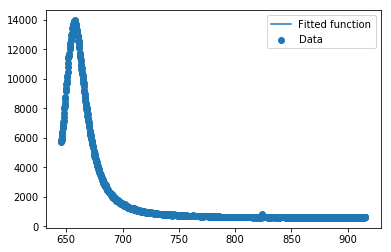

In [163]:
fitSpectrum1()

In [164]:
def fitSpectraSubset3(rangeLow,rangeHigh, stepSize):
    '''fit all reverse spectra to test_func and store fit params in rows of allParamsFor array'''
    global wavelength
    x_data = wavelength[rangeLow:rangeHigh]
    for i in range(0,len(newSeries),stepSize):
        try:
            y_data = newSeries[i][rangeLow:rangeHigh]
            params, params_covariance = optimize.curve_fit(lor_3, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
            plt.figure(figsize=(6, 4))
            plt.scatter(x_data, y_data, label='Data')
            plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7], params[8], params[9]),
                label='Fitted function')
            plt.legend(loc='best')
        except RuntimeError:
            print(i)
    return print('finished!')

In [165]:
def fitSpectraSubset2(rangeLow,rangeHigh, stepSize):
    '''fit all reverse spectra to test_func and store fit params in rows of allParamsFor array'''
    global wavelength
    x_data = wavelength[rangeLow:rangeHigh]
    for i in range(0,len(newSeries),stepSize):
        try:
            y_data = newSeries[i][rangeLow:rangeHigh]
            params, params_covariance = optimize.curve_fit(lor_2, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
            plt.figure(figsize=(6, 4))
            plt.scatter(x_data, y_data, label='Data')
            plt.plot(x_data, lor_2(x_data, params[0], params[1], params[2], params[3], params[4], params[5], params[6]),
                label='Fitted function')
            plt.legend(loc='best')
        except RuntimeError:
            print(i)
    return print('finished!')

In [166]:
def fitSpectraSubset1(rangeLow,rangeHigh, stepSize):
    '''fit all reverse spectra to test_func and store fit params in rows of allParamsFor array'''
    global wavelength
    x_data = wavelength[rangeLow:rangeHigh]
    for i in range(0,len(newSeries),stepSize):
        try:
            y_data = newSeries[i][rangeLow:rangeHigh]
            params, params_covariance = optimize.curve_fit(lor_1, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
            plt.figure(figsize=(6, 4))
            plt.scatter(x_data, y_data, label='Data')
            plt.plot(x_data, lor_1(x_data, params[0], params[1], params[2], params[3]),
                label='Fitted function')
            plt.legend(loc='best')
        except RuntimeError:
            print(i)
    return print('finished!')

finished!


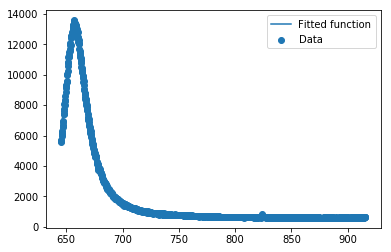

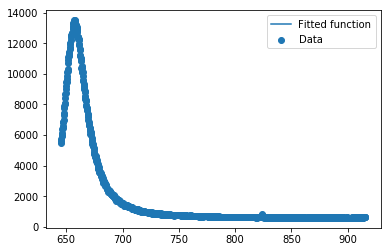

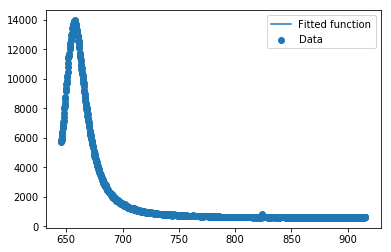

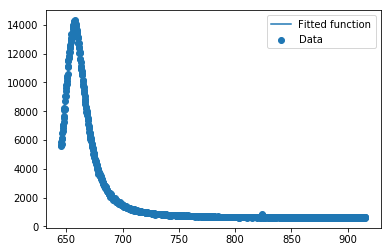

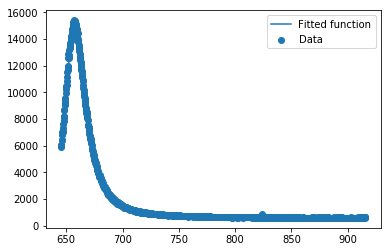

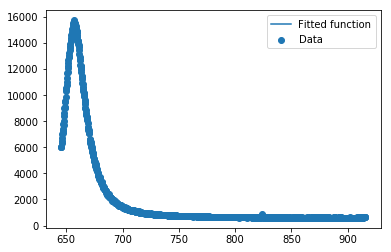

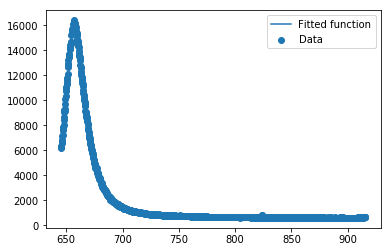

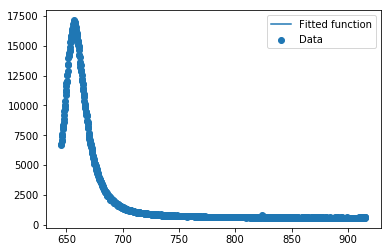

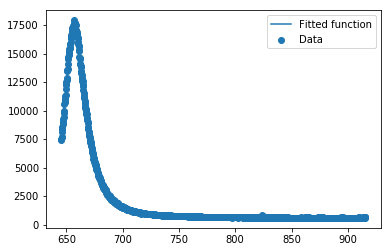

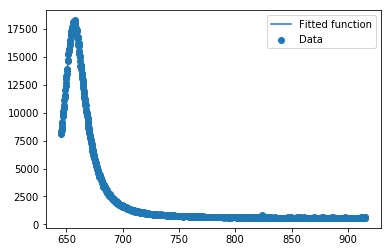

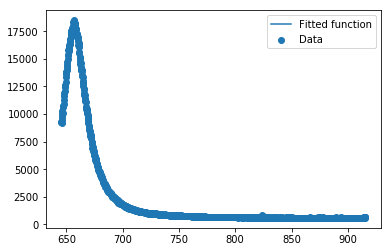

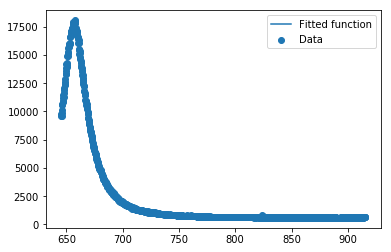

In [167]:
fitSpectraSubset1(rangeL,rangeH, 1)

In [168]:
def fitSpectra3(rangeLow,rangeHigh):
    '''fit all reverse spectra to test_func and store fit params in rows of allParamsFor array'''
    global allParams
    global wavelength
    allParams = []
    x_data = wavelength[rangeLow:rangeHigh]
    for i in range(0,len(newSeries)):
        try:
            y_data = newSeries[i][rangeLow:rangeHigh]
            params, params_covariance = optimize.curve_fit(lor_3, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
            allParams.append(params)
        except RuntimeError:
            allParamsRev.append([0,0,0,0,0,0,0])
            print(i)
    return print('finished fitting!')

In [169]:
def fitSpectra2(rangeLow,rangeHigh):
    '''fit all reverse spectra to test_func and store fit params in rows of allParamsFor array'''
    global allParams
    global wavelength
    allParams = []
    x_data = wavelength[rangeLow:rangeHigh]
    for i in range(0,len(newSeries)):
        try:
            y_data = newSeries[i][rangeLow:rangeHigh]
            params, params_covariance = optimize.curve_fit(lor_2, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
            allParams.append(params)
        except RuntimeError:
            allParamsRev.append([0,0,0,0,0,0,0])
            print(i)
    return print('finished fitting!')

In [170]:
def fitSpectra1(rangeLow,rangeHigh):
    '''fit all reverse spectra to test_func and store fit params in rows of allParamsFor array'''
    global allParams
    global wavelength
    allParams = []
    x_data = wavelength[rangeLow:rangeHigh]
    for i in range(0,len(newSeries)):
        try:
            y_data = newSeries[i][rangeLow:rangeHigh]
            params, params_covariance = optimize.curve_fit(lor_1, x_data, y_data,p0=initParams2,sigma=None,absolute_sigma=False,check_finite=True,bounds=paramBounds2)
            allParams.append(params)
        except RuntimeError:
            allParamsRev.append([0,0,0,0,0,0,0])
            print(i)
    return print('finished fitting!')

In [171]:
fitSpectra1(rangeL, rangeH)

finished fitting!


In [172]:
def plotTimeSeriesParams3():
    global allParamsFR
    global time
    time = list(range(0,len(newSeries)))
    allParamsFR = pd.DataFrame(allParams)
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[0])
    #plt.axis([0, 223, 500000, 1000000])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[1])
    #plt.axis([0, 223, 664, 670])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[2])
    #plt.axis([0, 223, 13, 16])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[3])
    #plt.axis([0, 223, 500000, 1000000])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[4])
    #plt.axis([0, 223, 656, 658])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[5])
    #plt.axis([0, 223, 8, 10])
    plt.show()
    plt.scatter(time,allParamsFR[6])
    #plt.axis([0, 223, 500000, 1000000])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[7])
    #plt.axis([0, 223, 656, 658])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[8])
    #plt.axis([0, 223, 8, 10])
    plt.show()

In [173]:
def plotTimeSeriesParams2():
    global allParamsFR
    global time
    time = list(range(0,len(newSeries)))
    allParamsFR = pd.DataFrame(allParams)
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[0])
    #plt.axis([0, 223, 500000, 1000000])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[1])
    #plt.axis([0, 223, 664, 670])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[2])
    #plt.axis([0, 223, 13, 16])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[3])
    #plt.axis([0, 223, 500000, 1000000])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[4])
    #plt.axis([0, 223, 656, 658])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[5])
    #plt.axis([0, 223, 8, 10])
    plt.show()

In [174]:
def plotTimeSeriesParams1():
    global allParamsFR
    global time
    time = list(range(0,len(newSeries)))
    allParamsFR = pd.DataFrame(allParams)
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[0])
    #plt.axis([0, 223, 500000, 1000000])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[1])
    #plt.axis([0, 223, 664, 670])
    plt.show()
    plt.figure(figsize=(6, 4))
    plt.scatter(time,allParamsFR[2])
    #plt.axis([0, 223, 13, 16])
    plt.show()

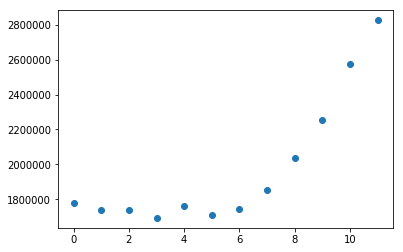

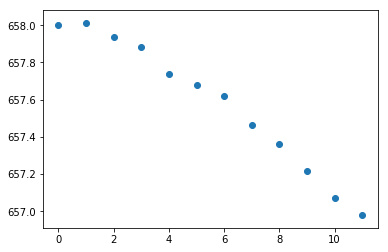

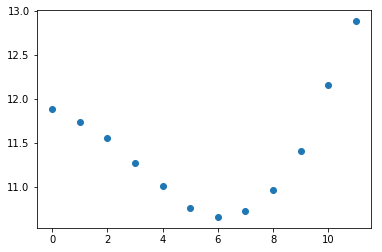

In [175]:
plotTimeSeriesParams1()

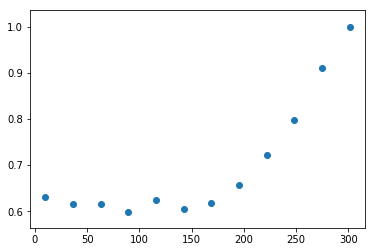

In [176]:
newTime = pd.DataFrame(time)
newTime = (450/17)*newTime + 10
setPoint = (allParamsFR[0]/(max(allParamsFR[0])))
plt.figure(figsize=(6, 4))
plt.scatter(newTime,setPoint)
#plt.axis([0, 223, 500000, 1000000])
plt.show()

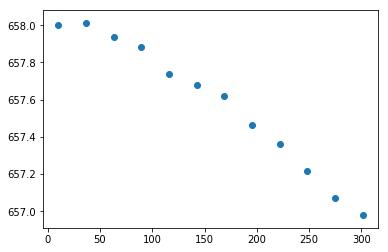

In [177]:
plt.figure(figsize=(6, 4))
plt.scatter(newTime,allParamsFR[1])
#plt.axis([0, 223, 664, 670])
plt.show()

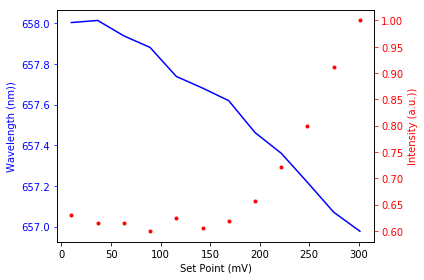

In [221]:
fig, ax1 = plt.subplots()
t = newTime
#s0 = correctedy
s1 = setPoint
#ax1.plot(t, s0, 'b-')
#plt.axis([0, 10.5, 0, 1])
ax1.plot(t, s2, 'b-')
ax1.set_xlabel('Set Point (mV)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Wavelength (nm))', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = allParamsFR[1]
ax2.plot(t, s1, 'r.')
ax2.set_ylabel('Intensity (a.u.))', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plotName = 'Pushing/intensity'+'.png'
plt.savefig(plotName)
plt.show()